In [1]:
# Add src to path for local execution without install
import sys
import os
sys.path.append(os.path.abspath('../src'))


# 開館・閉館ログ分析 (Building 2 Open/Close Analysis)

2号館の開館状況(`open_logs`)を分析します。

In [2]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from seras_analysis.data_loader import load_data
from seras_analysis.preprocessing import extract_daily_opening_times
from seras_analysis.plotting import plot_opening_time_stats

# データ読み込み
_, df_open = load_data()

# ==========================================
# Data Cleaning & Validating
# ==========================================
# - Ensure OPEN/CLOSE alternation
# - Filter durations < 1 hour (accidental presses)
df_daily_open = extract_daily_opening_times(df_open)

# 2号館のみに絞る（必要に応じて）
df_daily_open_b2 = df_daily_open.filter(pl.col("Building") == "2号館")

print("Data loaded and cleaned.")
display(df_daily_open_b2.head())

Data loaded and cleaned.


Date,Building,OpenTime,CloseTime,DurationHours,Opener,Closer
date,str,datetime[μs],datetime[μs],f64,str,str
2025-12-10,"""2号館""",2025-12-10 13:43:00,2025-12-11 00:39:42,10.945,"""わたひき""","""わたひき"""


## 開館時刻の統計分析

各日の「有効な」開館イベント（1時間以上継続したもの）を抽出し、その時刻のばらつきを曜日ごとに可視化します。

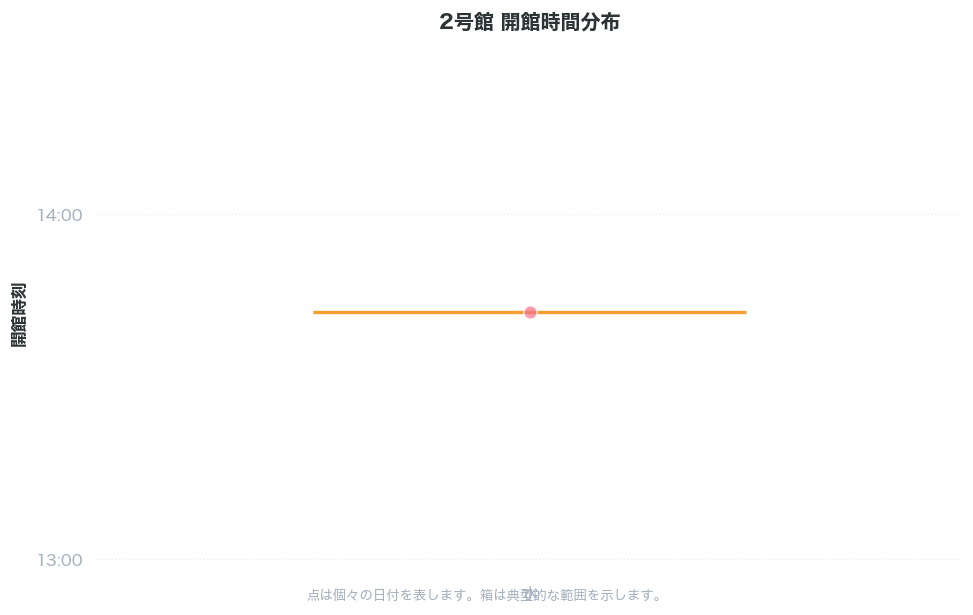

In [3]:
# 可視化: 曜日ごとの開館時刻分布
plot_opening_time_stats(df_daily_open_b2)